In [1]:
library("DESeq2")
library("dplyr")
library("ggplot2")
library("magrittr")

Warning message:
“package ‘DESeq2’ was built under R version 3.5.2”Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort,

In [22]:
results <- "results/"

In [8]:
df <- read.table('results/counts_for_DE.csv', row.names = 1, header=TRUE, sep=',')
df <-df[,order(colnames(df))]
head(df)

,HM43_LB,HM43_mouse,HM43_UR,HM43_UTI,HM56_LB,HM56_mouse,HM56_UR,HM56_UTI,HM86_LB,HM86_mouse,HM86_UR,HM86_UTI
b1632,1999,296,875,1360,4110,1174,4736,1809,6937,860,10034,949
b3187,9026,438,4685,990,11857,1601,7605,2142,9603,2181,6470,880
b1864,23055,2377,9739,5595,58938,8212,25955,10972,53927,10095,32852,4575
b0590,268,107,785,144,242,162,796,373,139,261,884,130
b2290,9083,901,5201,2879,19675,2453,17702,3006,23445,3423,18558,1563
b4461,2653,202,1710,725,4688,338,4277,1087,4759,812,6957,533


In [9]:
colData = read.table("results/info_for_DE.csv", 
                      row.names = 1, header=TRUE, sep=",")
colData <- colData[order(rownames(colData)),]

In [10]:
colData

,strain,treat
HM43_LB,HM43,LB
HM43_mouse,HM43,mouse
HM43_UR,HM43,UR
HM43_UTI,HM43,UTI
HM56_LB,HM56,LB
HM56_mouse,HM56,mouse
HM56_UR,HM56,UR
HM56_UTI,HM56,UTI
HM86_LB,HM86,LB
HM86_mouse,HM86,mouse


In [11]:
colnames(df) == rownames(colData)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [12]:
dds <- DESeqDataSetFromMatrix(countData = df,
                                  colData = colData,
                                  design = ~ treat)


converting counts to integer mode


In [13]:
rld <- rlog(dds, blind = FALSE)

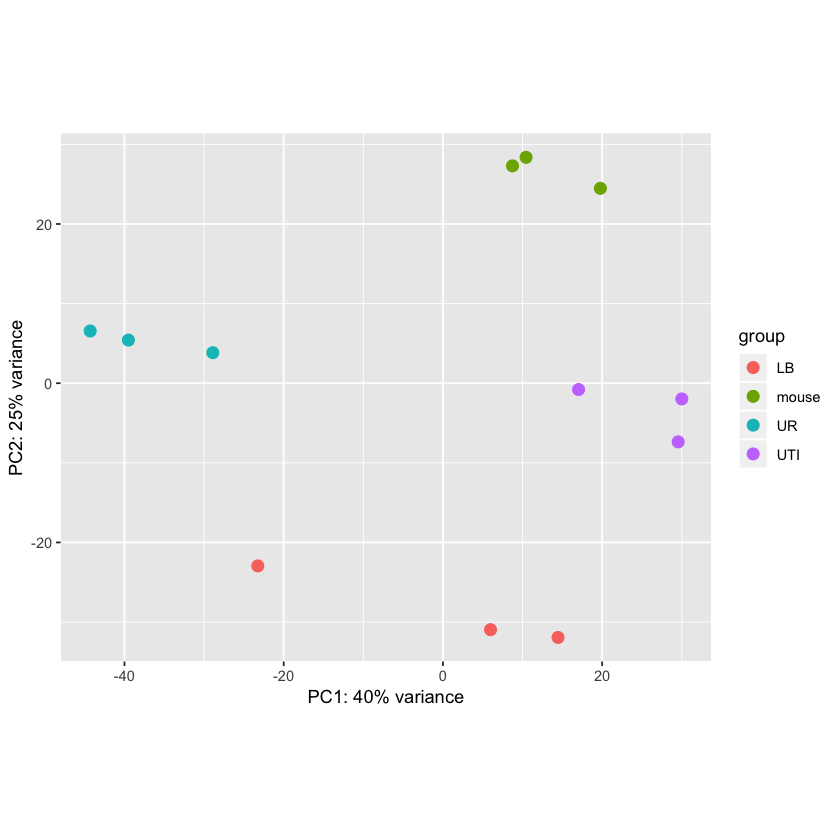

In [14]:
plotPCA(rld, intgroup = c('treat'))

In [21]:
process_results <- function (res, prefix, outdir){
 
  resSig <- subset(res, (padj < 0.05)& (abs(log2FoldChange) > 1))
  write.csv(resSig[order(resSig$log2FoldChange, decreasing = TRUE),], file.path(outdir, paste0(prefix, "_significant.csv")),
            row.names = TRUE, quote = FALSE)
  write.csv(res[order(res$log2FoldChange, decreasing = TRUE),], file.path(outdir, paste0(prefix, "_all.csv")),
            row.names = TRUE, quote = FALSE)
}

In [24]:
dds <- DESeqDataSetFromMatrix(countData = df,
                                  colData = colData,
                                  design = ~ treat)
analysis <- DESeq(dds)
res_LB <- results(analysis, contrast=c("treat","UTI","LB"),lfcThreshold = 1)
process_results(res_LB, "UTI_LB", results)
res_UR <- results(analysis, contrast=c("treat", "UTI", "UR"), lfcThreshold = 1)
process_results(res_UR, "UTI_UR", results)
res_mouse <- results(analysis, contrast=c("treat", "UTI", "mouse"), lfcThreshold = 1)
process_results(res_mouse, "UTI_mouse", results)
res_mouse_LB <- results(analysis, contrast=c("treat", "mouse", "LB"), lfcThreshold = 1)
process_results(res_mouse_LB, "mouse_LB", results)

converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [26]:
subset(res_mouse_LB, (padj < 0.05)& (abs(log2FoldChange) > 1))

log2 fold change (MLE): treat mouse vs LB 
Wald test p-value: treat mouse vs LB 
DataFrame with 269 rows and 6 columns
              baseMean    log2FoldChange             lfcSE              stat
             <numeric>         <numeric>         <numeric>         <numeric>
b0590 357.753129627728  2.30012214189528 0.415342409546136  3.13024172830312
b4079 719.894266325679  3.48480457762306 0.401855704221933  6.18332538649438
b0614 145.070809408147  7.41671341185832 0.745522924238641  8.60699678472173
b3329 103.874053048858  2.82821204125818  0.53664133526805   3.4067670921119
b1194 575.529048656368 -5.67993454426737  1.21649919447946 -3.84705108355612
...                ...               ...               ...               ...
b1083 1381.18376587676 -3.74067247562859 0.858321469615279 -3.19306061032941
b0872 95.2196807637117  4.42353058491262 0.861752247630337  3.97275503989309
b2375 246.726354393523   4.0488403479314 0.568397053263434  5.36392708306029
b1881 1136.36021347041 -4.85578941